# Decison Tree Bagging

In this section, I will implement bagging algorithm with sklearn's DecisionTreeClassifier.
Bagging algorithm is that randomly picking the same size of rows in the traing set to form many new different training sets. And use these training sets to train many different classifier. Finally, use these classifier to predict results. Here, we get lots of different results for one row, pick out the most numerous result!(This is what we called vote).
Okay, let just do it!

First, let's import the libs we need.

In [38]:
from random import randint
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Today, we have two tasks, one is binary classification, the other is multi classification.
Our data set gives us different types of glasses and their parameters.
First, read our data.

In [39]:
train_df = pd.read_table("glass.data",
                   names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type'],
                   skiprows=1,sep=",",index_col=None,engine='python')
test_df = pd.read_table("glass.test",
                   names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type'],
                   skiprows=1,sep=",",index_col=None,engine='python')

To implement the binary classification, the types must be handled!

Here we mark window glass as 1, non window glass as 0.

In [40]:
train_df_binary = train_df.copy(deep=True)
test_df_binary = test_df.copy(deep=True)
train_df_binary['type'].replace(r'windows', 1, regex=True, inplace=True)
train_df_binary['type'].replace(r'([^1])', 0, regex=True, inplace=True)
test_df_binary['type'].replace(r'windows', 1, regex=True, inplace=True)
test_df_binary['type'].replace(r'([^1])', 0, regex=True, inplace=True)

In [41]:
def get_n_sample_df(n, df):
    size = len(df)
    resArr = []
    for ii in range(n):
        temp_df = pd.DataFrame(columns=df.columns)
        for i in range(size):
            randomIndex = randint(0, size - 1)
            temp_df = temp_df.append(df.iloc[randomIndex])
        temp_df.reset_index(drop=True, inplace=True)
        resArr.append(temp_df)
    return resArr


In [42]:
def train_classifiers(num, df):
    arr = get_n_sample_df(num, df)
    result = []

    for bag in arr:
        # bag[bag.columns[:-1]] = scaler.fit_transform(bag[bag.columns[:-1]])
        X_train = bag[bag.columns[:-1]]
        Y_train = (bag['type'])
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, Y_train)
        result.append(clf)

    return result


In [43]:
def getResultFromClassfiers(cs, X):
    predictions = []
    votedPredictions = []
    for c in cs:
        res = c.predict(X)
        predictions.append(res)

    predictionsNum = len(predictions)
    listLen = len(predictions[0])

    for i in range(listLen):
        d = {}
        for ii in range(predictionsNum):
            result = predictions[ii][i]
            if result in d.keys():
                d[result] += 1
            else:
                d[result] = 1

        votedPredictions.append(max(d.items(), key=lambda x: x[1])[0])

    return votedPredictions


In [44]:
def bagging_clf(classierNum, df_train, df_test):

    cs = train_classifiers(classierNum, df_train)

    X_test = df_test[df_test.columns[:-1]]
    Y_test = df_test['type']

    votedPredictions = getResultFromClassfiers(cs, X_test)
    return votedPredictions


In [57]:
def normal_clf(df_train, df_test):
    clf = DecisionTreeClassifier()
    X_normal_train = df_train[train_df.columns[:-1]]
    Y_normal_train = df_train['type']
    clf.fit(X_normal_train, Y_normal_train)
    X_normal_test = df_test[test_df.columns[:-1]]
    return clf.predict(X_normal_test)

In [45]:
def accuracy(result, test_Y):
    length = len(result)
    right = 0
    for i in range(length):
        if result[i] == test_Y[i]:
            right += 1
    accuracy = right / length
    print("Accuracy: ", accuracy)
    return right / length

Accuracy:  0.6805555555555556
Accuracy:  0.625
Accuracy:  0.7638888888888888
Accuracy:  0.7638888888888888
Accuracy:  0.6666666666666666
Accuracy:  0.7222222222222222
Accuracy:  0.7638888888888888
Accuracy:  0.7083333333333334
Accuracy:  0.75
Accuracy:  0.6944444444444444
Accuracy:  0.7638888888888888
Accuracy:  0.7361111111111112
Accuracy:  0.7361111111111112
Accuracy:  0.7222222222222222
Accuracy:  0.7083333333333334
Accuracy:  0.7222222222222222
Accuracy:  0.7916666666666666
Accuracy:  0.75
Accuracy:  0.7638888888888888
Accuracy:  0.7361111111111112
Accuracy:  0.75
Accuracy:  0.7361111111111112
Accuracy:  0.7361111111111112
Accuracy:  0.75
Accuracy:  0.75
Accuracy:  0.75
Accuracy:  0.75
Accuracy:  0.7361111111111112
Accuracy:  0.7361111111111112
Accuracy:  0.7638888888888888


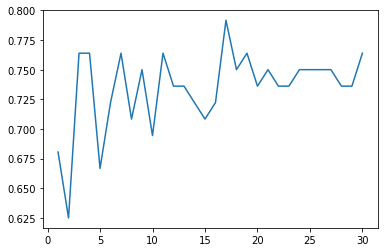

In [62]:
accuracies = []
for i in range(30):
    result = bagging_clf(i+1, train_df, test_df)
    accuracies.append(accuracy(result, test_df['type']))
    
plt.plot(list(range(31)[1:]), accuracies)
plt.show()

In [92]:
accuracy(normal_clf(train_df, test_df), test_df['type'])

Accuracy:  0.7083333333333334


0.7083333333333334

As you can see, with only one bag, the result is obviously not as good as normal decisiontree, but as the bag number increased, the accuracy gets better. Finally, the accuracy is stable at around 0.74. 0.4 better than the normal accuracy!!!

Bagging algorithm does help a lot on multi classification!
So, what about binary classification?

Accuracy:  0.875
Accuracy:  0.9444444444444444
Accuracy:  0.9027777777777778
Accuracy:  0.9305555555555556
Accuracy:  0.9166666666666666
Accuracy:  0.9305555555555556
Accuracy:  0.9166666666666666
Accuracy:  0.9166666666666666
Accuracy:  0.9444444444444444
Accuracy:  0.9305555555555556
Accuracy:  0.9166666666666666
Accuracy:  0.9444444444444444
Accuracy:  0.9166666666666666
Accuracy:  0.9027777777777778
Accuracy:  0.9305555555555556
Accuracy:  0.9444444444444444
Accuracy:  0.9305555555555556
Accuracy:  0.9166666666666666
Accuracy:  0.9166666666666666
Accuracy:  0.9305555555555556
Accuracy:  0.9444444444444444
Accuracy:  0.9444444444444444
Accuracy:  0.9166666666666666
Accuracy:  0.9166666666666666
Accuracy:  0.9166666666666666
Accuracy:  0.9027777777777778
Accuracy:  0.9166666666666666
Accuracy:  0.9444444444444444
Accuracy:  0.9583333333333334
Accuracy:  0.9305555555555556


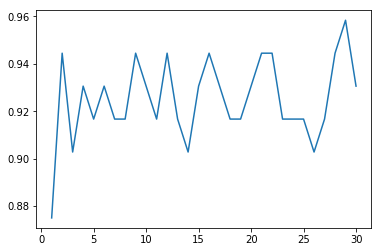

In [64]:
accuracies = []
for i in range(30):
    result = bagging_clf(i+1, train_df_binary, test_df_binary)
    accuracies.append(accuracy(result, test_df_binary['type']))
    
plt.plot(list(range(31)[1:]), accuracies)
plt.show()

In [84]:
accuracy(normal_clf(train_df_binary, test_df_binary), test_df_binary['type'])

Accuracy:  0.9027777777777778


0.9027777777777778

As you can see, this doesn't help a lot on binary classification, the result is still not very stable. Most baggin results are 0.1~0.2 better than the noraml method.

In my opinion, the more types we need to predict, the more useful bagging algorithm is.